In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import pandas as pd
names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
         'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
    'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
    'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
    'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
     'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
    'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock']
data = pd.read_csv("tidalearth.tidalearth.forward", names=names, delim_whitespace=True)
data[:5]

,Time,TMan,TUMan,TLMan,TCMB,TCore,HflowUMan,HflowMeltMan,RadPowerMan,RadPowerCore,...,ChiOC,ChiIC,MassChiOC,MassChiIC,MassOC,MassIC,RadPowerTotal,SurfEnFluxEqtide,PowerEqtide,TideLock
0,0.0000,3500.000000,2450.000000,4550.000000,4400.000000,5500.000000,258278.0,59920.25,74.591650,34.624677,...,0.094946,0.0,1.843482e+23,0.0,1.941615e+24,0.0,142.484107,7.883419e-12,2.549780e-01,1.0
1,0.0001,3358.758912,2351.147741,4366.417233,4400.124740,5500.155936,197330.6,45780.44,74.587454,34.622763,...,0.094946,0.0,1.843482e+23,0.0,1.941615e+24,0.0,142.476114,1.883930e-13,6.093000e-03,1.0
2,0.0002,3248.425346,2273.912839,4222.980986,4400.162345,5500.202939,157583.3,36559.08,74.583258,34.620849,...,0.094946,0.0,1.843482e+23,0.0,1.941615e+24,0.0,142.468118,5.827168e-16,1.884714e-05,1.0
3,0.0003,3158.886809,2211.229215,4106.568542,4400.185771,5500.232218,129929.0,30143.27,74.579062,34.618934,...,0.094946,0.0,1.843482e+23,0.0,1.941615e+24,0.0,142.460122,4.232481e-18,1.368935e-07,1.0
4,0.0004,3084.161807,2158.921861,4009.426314,4400.199282,5500.249105,109750.0,25461.76,74.574866,34.617020,...,0.094946,0.0,1.843482e+23,0.0,1.941615e+24,0.0,142.452127,5.878667e-20,1.901370e-09,1.0


In [37]:
## calculate SMA

perb = 2.7299025 / 365.25 # days to years
smab = np.power(perb**2.0, 1/3.)
print (smab)

perc = 8.4575 / 365.25 # days to years
smac = np.power(perc**2.0, 1/3.)
print (smac)

0.038227093115422356
0.08123961462255531


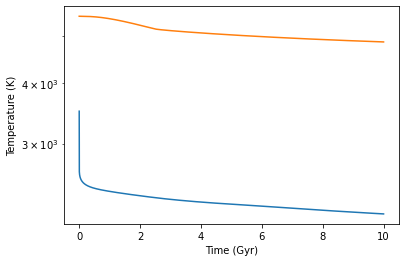

In [23]:
plt.plot(data['Time'], data['TMan'], label="Mantle")
plt.plot(data['Time'], data['TCore'], label="Core")
plt.ylabel('Temperature (K)')
plt.xlabel('Time (Gyr)')
plt.yscale("log")
s_yr = 3600.*24*365

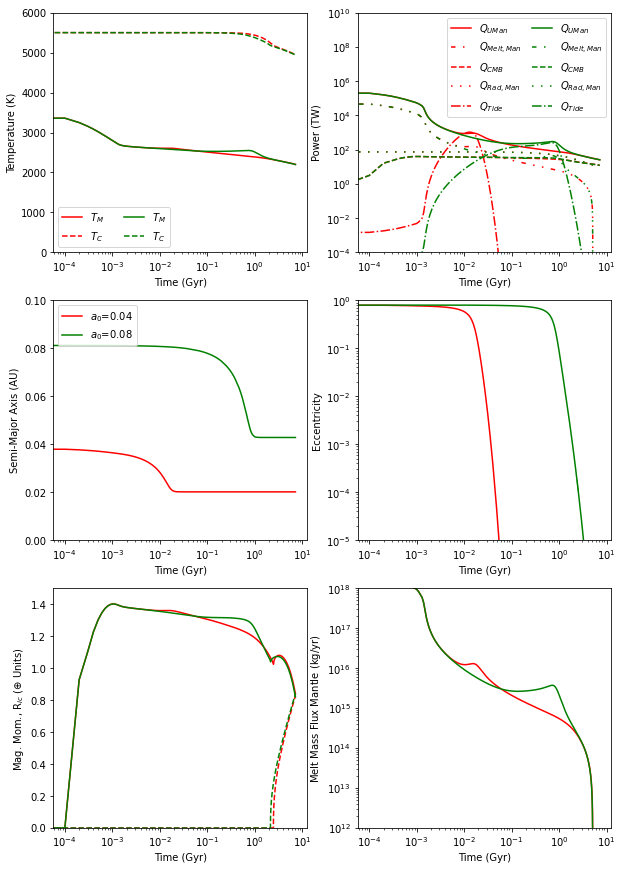

In [46]:
colz = ['r', 'g', 'k']
filez = ["tidalearth.b.forward", "tidalearth.c.forward"]

for i, item in enumerate(filez):
    data = pd.read_csv(item, names=names, delim_whitespace=True)
    fig = plt.figure(1, figsize=(10,15))
    panel=1
    rows = 3
    cols = 2
    color = colz[i]
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['TMan'],linestyle='-',color=color,label=r'$T_{M}$')
    plt.plot(data['Time'],data['TCore'],'--',color=color,label=r'$T_{C}$')
    plt.legend(loc='best',ncol=2,frameon=True)
    plt.ylabel('Temperature (K)')
    plt.xlabel('Time (Gyr)')
    plt.ylim(0,6e3)
    plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['HflowUMan'],linestyle='-',color=color,label=r'$Q_{UMan}$')
    plt.plot(data['Time'],data['HflowMeltMan'],linestyle=(0, (3, 5, 1, 5, 1, 5)),color=color,label=r'$Q_{Melt,Man}$')
    plt.plot(data['Time'],data['HflowCMB'],linestyle='--',color=color,label=r'$Q_{CMB}$')
    plt.plot(data['Time'],data['RadPowerMan'],linestyle=(0, (1, 5)),color=color,label=r'$Q_{Rad,Man}$')
    plt.plot(data['Time'],data['PowerEqtide'],'-.',color=color,label=r'$Q_{Tide}$')
    plt.yscale('log'); plt.xscale('log')
    plt.legend(loc='upper right',frameon=True,ncol=2,columnspacing=1)
    plt.ylabel('Power (TW)')
    plt.xlabel('Time (Gyr)')
    ymax=1e10
    plt.ylim(1e-4,ymax)
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['SemiMajorAxis'],color=color,label='$a_0$=%.2f'%data['SemiMajorAxis'].values[0])
    plt.ylabel(r'Semi-Major Axis (AU)')
    plt.xlabel('Time (Gyr)')
    plt.ylim(0,0.10)
    plt.xscale('log')
    plt.legend(frameon=True,loc='upper left')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.loglog(data['Time'],data['Eccentricity'],color=color,label='ecc')
    plt.ylabel(r'Eccentricity')
    plt.xlabel('Time (Gyr)')
    plt.ylim(1e-5,1)
    plt.yscale('log'); plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['MagMom'],color=color,label='MagMom')
    plt.plot(data['Time'],data['RIC']/3481,color=color,linestyle='--')
    plt.ylim(0,1.5)
    plt.ylabel('Mag. Mom., R$_{ic}$ ($\oplus$ Units)')
    plt.xlabel('Time (Gyr)')
    plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['MeltMassFluxMan']*s_yr,color=color)
    plt.ylabel(r'Melt Mass Flux Mantle (kg$/$yr)')
    plt.xlabel('Time (Gyr)')
    plt.ylim(1e12,1e18)
    plt.yscale('log'); plt.xscale('log')
plt.savefig("/Users/jcbecker/Downloads/temp.png", dpi=150, bbox_inches = "tight")